# Load Packages and Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Survey_2024_Cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])
df.info()
df.set_index('ID', inplace=True)

<class 'pandas.DataFrame'>
RangeIndex: 7522 entries, 0 to 7521
Data columns (total 98 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   ID                                               7522 non-null   int64         
 1   Start_Date                                       7522 non-null   datetime64[us]
 2   End_Date                                         7522 non-null   datetime64[us]
 3   Date                                             7522 non-null   datetime64[us]
 4   Membership                                       7522 non-null   int64         
 5   Residence                                        7522 non-null   str           
 6   Postal                                           6653 non-null   str           
 7   Enth_British                                     7522 non-null   int64         
 8   Enth_French                                      

# Overall Satisfaction

## CSAT

In [5]:
print(f"{np.where(df['Overall_Sat'] >= 4,1,0).mean().round(4) *100:.2f}% of survey respondants satisfied (CSAT)")

74.22% of survey respondants satisfied (CSAT)


## NPS

In [6]:
df['Zoo_Promotion'] =  pd.cut(df['Likely_Rec'], bins=[-1,6,8,10], labels=['Detractors','Passives','Promoters'], include_lowest = True)
NPS = df['Zoo_Promotion'].value_counts()/df['Zoo_Promotion'].shape[0]
print(f"{(NPS['Promoters'] - NPS['Detractors'])*100:.2f}% more promoters than detractors (NPS)")

26.28% more promoters than detractors (NPS)


# Satisfaction and Popularity of Zoo Sub-Areas and Features

## Zoo Sub-Areas

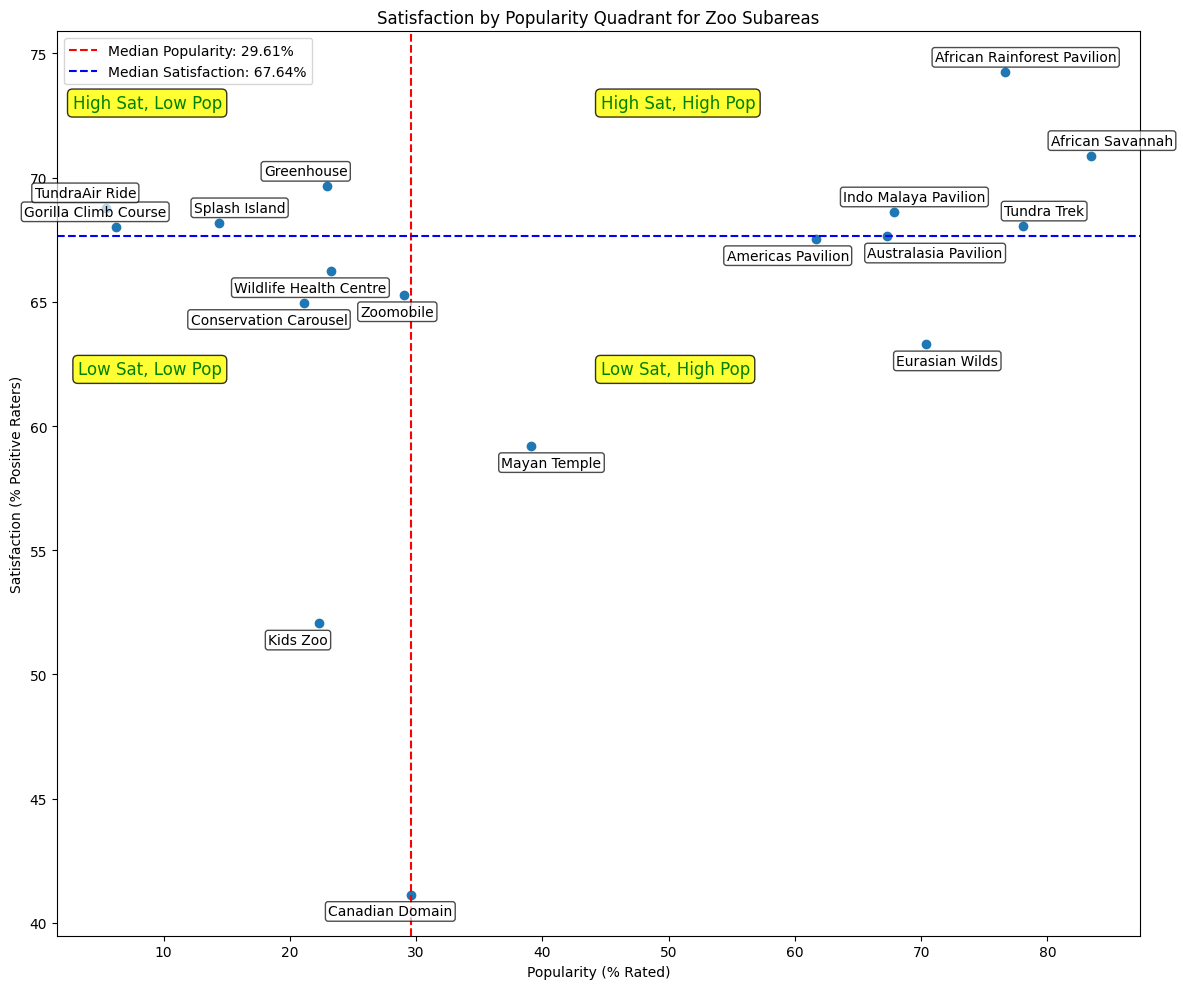

In [7]:
area_cols = [col for col in df.columns if (col.startswith('Area_Sat_') or col.startswith('Adv_Sat_')) and not col.endswith('_Mean') and not col.endswith('_Unattended')]
data = []
for col in area_cols:
    subarea = col.replace('Area_Sat_', '').replace('Adv_Sat_', '').replace('_', ' ')
    pop = df[col].notna().sum()/df.shape[0] * 100
    sat = (df[col].dropna() > 3).mean() * 100
    data.append({'Subarea': subarea, 'Popularity': pop, 'Satisfaction': sat})

quad_df = pd.DataFrame(data)
median_pop, median_sat = quad_df['Popularity'].median(), quad_df['Satisfaction'].median()

# Plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(quad_df['Popularity'], quad_df['Satisfaction'])

# Add labels with adjusted positions
for i, row in quad_df.iterrows():
    x, y = row['Popularity'], row['Satisfaction']
    if row['Subarea'] == 'Americas Pavilion':
        xytext = (-20, -15)
    elif row['Subarea'] == 'Australasia Pavilion':
        xytext = (35, -15)
    elif row['Subarea'] == 'Splash Island':
        xytext = (15, 8)
    elif row['Subarea'] == 'Conservation Carousel':
        xytext = (-25, -15)
    elif row['Subarea'] == 'Zoomobile':
        xytext = (-5, -15)
    elif x > median_pop and y > median_sat:
        xytext = (15, 8)
    elif x > median_pop and y <= median_sat:
        xytext = (15, -15)
    elif x <= median_pop and y > median_sat:
        xytext = (-15, 8)
    else:
        xytext = (-15, -15)
    ax.annotate(row['Subarea'], (x, y), xytext=xytext, textcoords='offset points', ha='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

ax.set_xlabel('Popularity (% Rated)')
ax.set_ylabel('Satisfaction (% Positive Raters)')
ax.set_title('Satisfaction by Popularity Quadrant for Zoo Subareas')

# Add quadrant lines at medians
ax.axvline(median_pop, color='red', linestyle='--', label=f'Median Popularity: {median_pop:.2f}%')
ax.axhline(median_sat, color='blue', linestyle='--', label=f'Median Satisfaction: {median_sat:.2f}%')

# Label quadrants with better positioning and background
ax.text(median_pop + 15, median_sat + 5, 'High Sat, High Pop', ha='left', va='bottom', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
ax.text(median_pop - 15, median_sat + 5, 'High Sat, Low Pop', ha='right', va='bottom', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
ax.text(median_pop + 15, median_sat - 5, 'Low Sat, High Pop', ha='left', va='top', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
ax.text(median_pop - 15, median_sat - 5, 'Low Sat, Low Pop', ha='right', va='top', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

ax.legend()
plt.tight_layout()
plt.show()

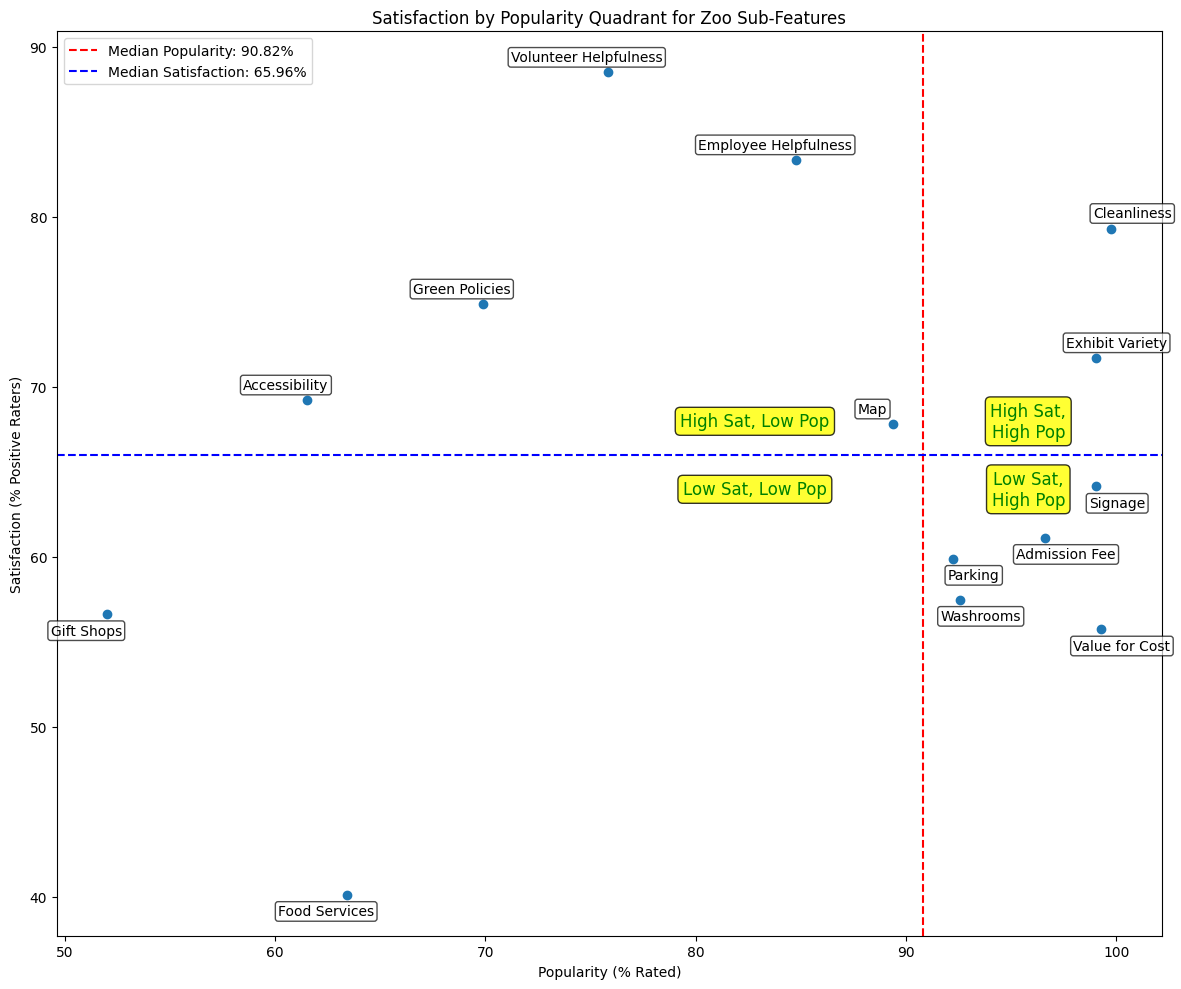

In [8]:
sat_cols = [col for col in df.columns if col.startswith('Sat_') and not col.endswith('_Mean')]

data = []
for col in sat_cols:
    subarea = col.replace('Sat_', '').replace('_', ' ').replace('Variety','Exhibit Variety').replace('Signs','Signage').replace('Vol','Volunteer').replace('Emp','Employee').replace('Green','Green Policies').replace('Admission','Admission Fee').replace('Value','Value for Cost').replace('Food','Food Services')
    pop = df[col].notna().sum()/df.shape[0] * 100
    sat = (df[col].dropna() > 3).mean() * 100
    data.append({'Subarea': subarea, 'Popularity': pop, 'Satisfaction': sat})

quad_df = pd.DataFrame(data)
median_pop, median_sat = quad_df['Popularity'].median(), quad_df['Satisfaction'].median()


# Plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(quad_df['Popularity'], quad_df['Satisfaction'])

# Add labels with adjusted positions
for i, row in quad_df.iterrows():
    x, y = row['Popularity'], row['Satisfaction']
    if x > median_pop and y > median_sat:
        xytext = (15, 8)
    elif x > median_pop and y <= median_sat:
        xytext = (15, -15)
    elif x <= median_pop and y > median_sat:
        xytext = (-15, 8)
    else:
        xytext = (-15, -15)
    ax.annotate(row['Subarea'], (x, y), xytext=xytext, textcoords='offset points', ha='center', fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

ax.set_xlabel('Popularity (% Rated)')
ax.set_ylabel('Satisfaction (% Positive Raters)')
ax.set_title('Satisfaction by Popularity Quadrant for Zoo Sub-Features')

# Add quadrant lines at medians
ax.axvline(median_pop, color='red', linestyle='--', label=f'Median Popularity: {median_pop:.2f}%')
ax.axhline(median_sat, color='blue', linestyle='--', label=f'Median Satisfaction: {median_sat:.2f}%')

# Label quadrants centered in each quadrant
ax.text(median_pop + 5, median_sat + 2, 'High Sat,\nHigh Pop', ha='center', va='center', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
ax.text(median_pop - 8, median_sat + 2, 'High Sat, Low Pop', ha='center', va='center', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
ax.text(median_pop + 5, median_sat - 2, 'Low Sat,\nHigh Pop', ha='center', va='center', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))
ax.text(median_pop - 8, median_sat - 2, 'Low Sat, Low Pop', ha='center', va='center', fontsize=12, color='green',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

ax.legend()
plt.tight_layout()
plt.show()